In [1]:
import torch
import numpy as np
from cryodrgn.source import ImageSource
import os
import pickle
import torch

dat = torch.load("/home/gridsan/jroney/all_projections.pt")
ids = dat['ids']
images = dat['images']
phis = dat['phis']
thetas = dat['thetas']
dmat = torch.load("/home/gridsan/jroney/siren_vols_distance_mat.pt")

/tmp/ipykernel_1170092/1361592005.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dat = torch.load("/home/gridsan/jroney/all_projections.pt")
/tmp/ipykernel_1170092/1361

In [2]:
print(images.shape)
print(phis.shape)
print(thetas.shape)
print(ids.shape)
print(dmat.shape)

torch.Size([3770, 192, 128, 128])
torch.Size([3770, 192])
torch.Size([3770, 192])
torch.Size([3770])
torch.Size([3770, 3770])


In [3]:
from cryofinder.resnet.data import ContrastiveProjectionDataset


dataset = ContrastiveProjectionDataset(images, phis, thetas, ids, dfu=[10000, 15000, 20000, 25000], snr1=[7.5,9,12, 15], pos_angle_threshold=45, obj_distance_matrix=dmat, pos_sim_threshold=0.4)
loader = torch.utils.data.DataLoader(dataset, collate_fn=lambda x: ContrastiveProjectionDataset.collate_fn(x, dataset.lat, dataset.mask, dataset.freqs, ctf_corrupt=False, noise=True), shuffle=True, batch_size=128)

(INFO) (lattice.py) (03-Apr-25 11:54:06) Using circular lattice with radius=64


/state/partition1/llgrid/pkg/anaconda/python-ML-2025a/lib/python3.10/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
imgs, ctf, _ids = next(iter(loader))

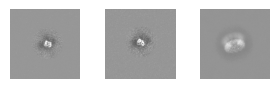

tensor([16344, 16344, 31581])


In [6]:
import matplotlib.pyplot as plt
from cryofinder.analyze_search_outputs import plot_projections

# visualize a anchor, positive, negative batch from the dataloader, as well as the EMDB ids of the corresponding volumes
i=4
plot_projections(imgs[i], nrows=1, norm_brightness=True)
plt.show()
print(_ids[i])

In [10]:
(_ids[:,0] != _ids[:,1]).sum() / 128 # check fraction of anchor-positive pairs that are not from the same volume

tensor(0.5781)

In [13]:
# print EMDBs of volumes in the same clutser as a given ID

emd = 33793
idx = (ids == emd).to(torch.float).argmax()
clust = [f"EMD-{i.item()}" for i in ids[dmat[idx, :] > 0.4]]
clust

['EMD-33791',
 'EMD-29516',
 'EMD-27959',
 'EMD-29518',
 'EMD-33788',
 'EMD-29517',
 'EMD-34674',
 'EMD-24947',
 'EMD-33789',
 'EMD-29520',
 'EMD-24949',
 'EMD-24946',
 'EMD-33793',
 'EMD-33792',
 'EMD-27961',
 'EMD-24948',
 'EMD-27958',
 'EMD-27953',
 'EMD-29515',
 'EMD-33795',
 'EMD-33798',
 'EMD-29519',
 'EMD-27955',
 'EMD-29521']